## **3.2 Consensus Control in Multi-Agent Systems**

### **1. Introduction to Consensus Control** 

Consensus control is a fundamental concept in the coordination of multi-agent systems. It involves designing control laws that ensure all agents in a network reach an agreement on certain quantities of interest. This agreement is crucial for tasks such as formation control, distributed sensing, and cooperative robotics.

### **2. Mathematical Formulation**

Consider a multi-agent system with $ n $ agents. The state of agent $ i $ at time $ t $ is denoted by $ x_i(t) $. The goal is to design control inputs $ u_i(t) $ such that all agents' states converge to a common value $ x^* $.


#### **(1) Continuous-Time Systems**:
For a continuous-time multi-agent system, the consensus problem can be formulated using the following differential equation:
$$
\dot{x}_i(t) = -\sum_{j \in \mathcal{N}_i} a_{ij} (x_i(t) - x_j(t))
$$
where:
- $ x_i(t) $ is the state of agent $ i $ at time $ t $.
- $ \mathcal{N}_i $ is the set of neighbors of agent $ i $.
- $ a_{ij} $ are the weights of the communication links.

The consensus value $ x^* $ is achieved when:
$$
\lim_{t \to \infty} x_i(t) = x^* \quad \forall i
$$

**Example**:
Consider three agents with initial states $ x_1(0) = 1 $, $ x_2(0) = 3 $, and $ x_3(0) = 5 $. If they communicate with equal weights, the consensus value $ x^* $ will be the average of the initial states:
$$
x^* = \frac{1 + 3 + 5}{3} = 3
$$

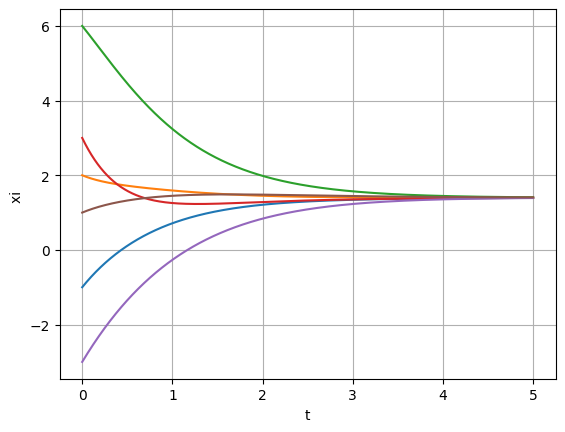

In [1]:
from scipy. integrate import odeint 
import numpy as np 
import matplotlib. pyplot as plt 

def MAS(x,t,N):
    dxdt = [0] * len(N)
    u = [0] * len(N) 
    # Definition of agent i 
    for i in range(len(N)):
        # Computation of the control input of agent i 
        dif = [] 
        for j in N[i]:
           dif.append(x[j] - x[i]) 

        u[i] = sum(dif) 
        # Dynamics of agent i 
        dxdt[i] = u[i] 
    return dxdt 

N = [[2], [3,5], [4], [1,2], [6], [2]] 
x0 = [-1, 2, 6, 3, -3, 1] 
t = np.arange(0, 5, 0.001) 
N.insert(0 ,[]) 
x0.insert(0,0) 
x = odeint(MAS , x0 , t, args=(N,)) 
plt.plot(t,np.delete(x, 0, 1)) 
plt.xlabel('t') 
plt.ylabel('xi ') 
plt.grid() 
plt.show() 

#### **(2). Discrete-Time Systems**:
For discrete-time systems, the consensus problem can be formulated using the following update rule:
$$
x_i(k+1) = x_i(k) + \sum_{j \in \mathcal{N}_i} b_{ij} (x_j(k) - x_i(k))
$$
where:
- $ x_i(k) $ is the state of agent $ i $ at time step $ k $.
- $ b_{ij} $ are the weights of the communication links.

The consensus value $ x^* $ is achieved when:
$$
\lim_{k \to \infty} x_i(k) = x^* \quad \forall i
$$

**Example**:
Consider a network of four sensors with initial measurements $ x_1(0) = 2 $, $ x_2(0) = 4 $, $ x_3(0) = 6 $, and $ x_4(0) = 8 $. If they update their measurements based on their neighbors, the consensus value $ x^* $ will be the average of the initial measurements:
$$
x^* = \frac{2 + 4 + 6 + 8}{4} = 5
$$

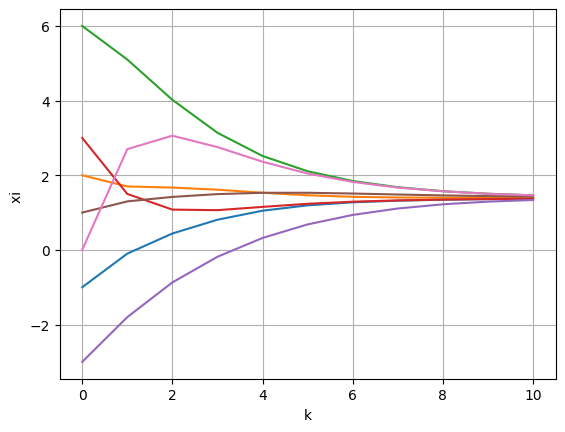

In [3]:
from scipy. integrate import odeint 
import numpy as np 
import matplotlib. pyplot as plt 
 
def MAS(x,N,e): 
 
    x_next = [0] * len(N) 
    u = [0] * len(N) 
 
    # Definition of agent i 
    for i in range(len(N)): 
 
        # Computation of the control input of agent i 
        dif = [] 
 
        for j in N[i]: 
            dif.append(x[j] - x[i]) 

        u[i] = e * sum(dif) 

        # Dynamics of agent i 
        x_next[i] = x[i] + u[i] 
 
    return x_next 

N = [[2], [3,5], [4], [1,2], [6], [2] , [4,3]] 
e = 0.3
x0 = [-1, 2, 6, 3, -3, 1 , 0] 
K = np.arange(0, 11, 1) 
 
N.insert(0 ,[]) 
x0.insert(0,0) 
X = [] 
xk = x0 
for k in K: 
    x_next = MAS(xk ,N,e) 
    X.append(xk) 
    xk = x_next 
 
plt.plot(K,np.delete(X, 0, 1)) 
plt.xlabel('k') 
plt.ylabel('xi ') 
plt.grid() 
plt.show() 

for case 3d agents 

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_632\2924598462.py:42: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax.plot(X[:, i, 0], X[:, i, 1], X[:, i, 2], label=f'Agent {i}')


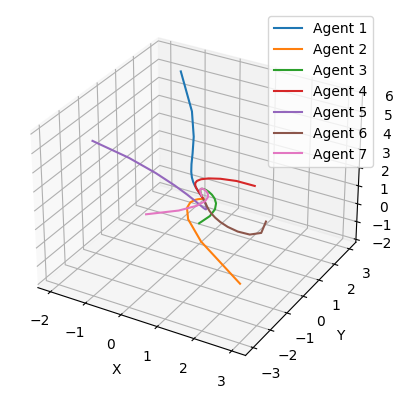

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def MAS(x, N, e):
    x_next = np.zeros_like(x)
    u = np.zeros_like(x)

    # Definition of agent i
    for i in range(len(N)):
        # Computation of the control input of agent i
        dif = []

        for j in N[i]:
            dif.append(x[j] - x[i])

        u[i] = e * np.sum(dif, axis=0)

        # Dynamics of agent i
        x_next[i] = x[i] + u[i]

    return x_next

N = [[2], [3, 5], [4], [1, 2], [6], [2], [4, 3]]
e = 0.2
x0 = np.array([[-1, 2, 6], [3, -3, 1], [0, 1, -1], [2, 0, 3], [-2, -1, 4], [1, 3, -2], [0, -2, 2]])
K = np.arange(0, 21, 1)

N.insert(0, [])
x0 = np.vstack((np.zeros((1, 3)), x0))
X = []
xk = x0
for k in K:
    x_next = MAS(xk, N, e)
    X.append(xk)
    xk = x_next

X = np.array(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1, len(x0)):
    ax.plot(X[:, i, 0], X[:, i, 1], X[:, i, 2], label=f'Agent {i}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()